# Learning objectives:
- Connect similarity of logistic regression and linear regression-- both create linear model of the parameter of a model (loc or p), where the parameter (loc or p) is predicted based on other features
- Able to roughly convert between probabilities and log odds
- Describe why we use log odds in a linear model for binary variables
- Interpret parameters of a logistic regression model

## 1. Linear models for binary variables
Modeling mean fruit length as a function of genotype or plant height: model the **mean (aka loc)** of the normal. The **expected mean** depends on the other characteristics of the plant.

We can also model binary variables in the same way. But of course, we are modeling **p** the probability of 1 vs 0, not mean. Then **expected chance of a 1** could depend on another variable. Examples.
- *binary feature*: whether you voted or not; *another feature*: your age
- *binary feature*: having a cavity;  *another feature*: frequency of flossing

Another example, look at our bird watching data. Previously we made a column called `has_mega` that says whether or not each site had Megalaima (a genus of bird). Then we did a histogram of elevations for sites that do vs don't have Megalaima: 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

sns.set_theme() 
sites = pd.read_table("../data/eco_data/eco_sites.txt")
counts = pd.read_table("../data/eco_data/species_counts.txt")


is_mega = counts.columns.str.contains('Megalaima')
sites['has_mega'] = counts.loc[:,is_mega].sum(axis=1) > 0
sites.head()

,Elevation,North,East,WorE,has_mega
A2,198.25,26.978983,92.921975,E,True
A3,734.25,27.006267,92.404575,E,True
A4,1243.25,27.027496,92.410408,E,True
A6,2629.00,27.147733,92.459379,E,False
A7,2340.25,27.091979,92.408567,E,False


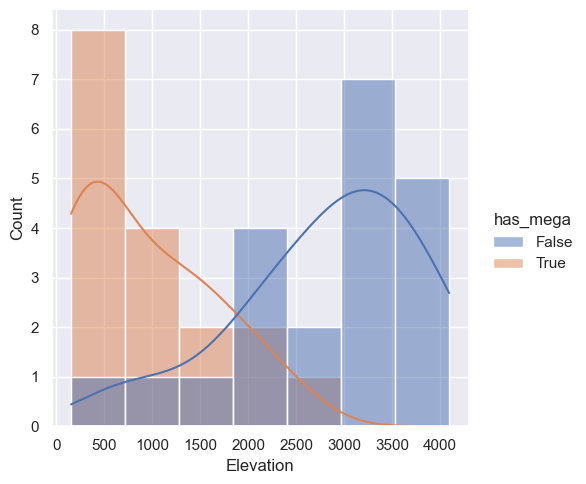

In [4]:
sns.displot(data=sites, x="Elevation", hue="has_mega", kde=True)

**Exercise 1.1**: What is the binary feature here? Does it seem like the binary feature being True/False (1/0) depends on any other feature?

<font color = lightgreen> Has_mega is the binary feature. Yes, megalaima

**Exercise 1.2**: Think of another example, besides the ones above, in biology or elsewhere where there is a binary feature and another feature, and the probability of getting a 1 vs 0 in the binary feature depends on the value of the other feature. Each person in the group think of one and the group will share one of these

<font color = lightgreen> Income and whether or not you feel you have food security

## 2. Take 1: Try to make a linear model for the binary feature
Previously with linear regression we modeled the mean of a normal. We know that the binary data is not modeled with a normal but with a Bernoulli, but let's try to model the same way.

**Exercise 2.1**: Write a possible linear probability model for `has_mega` as a function of elevation, picking numbers you think might make a good model. As a reminder a linear model should look like the model we made for fruit length ${fruit length mean} = 12 + 3 * genotypeNumber$.  

1. What is the meaning of the intercept?
2. What is the meaning of the slope?

In [8]:
print('has_mega = 1 - elevation/2500')

has_mega = 1 - elevation/2500


**Exercise 2.2**: What would you expect it to look like if you plotted elevation versus your prediction? 
- **A**: Fill in the predicted values below and then run the cell to make the plot. Adjust your values if you want
- **B**: Examine the plot and describe its strengths and weaknesses. Where does it work well?

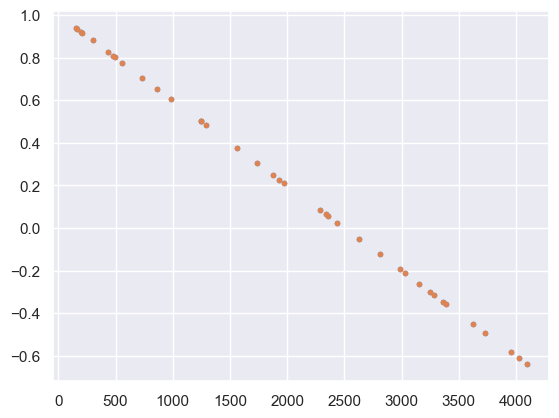

In [10]:
prediction = 1 - sites['Elevation']/2500
import matplotlib.pyplot as plt
plt.plot(sites['Elevation'],prediction,'.')
plt.show()

## 3 Log Odds
It's actually not possible to model probabilities using the same linear model. You can see it doesn't work because p has to be between 0 and 1.

So we use a special function called the **log odds**. The **odds** are simply defined as $odds = {p \over{1-p}}$.  Then the log odds is just the log of the odds. So you can see, the higher the value of p, the higher the value of the log odds.

Instead of modeling p we will model log odds. But first let's get comfortable with log odds.

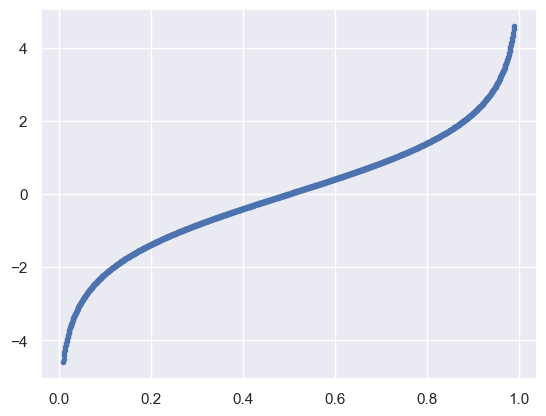

In [20]:
p = np.linspace(.01,.99,1000)
odds = p/(1-p)
log_odds = np.log(odds)
plt.plot(p, log_odds,'.')
plt.show()

Just like a number variable, the log-odds can take on any value. (-infinity to +infinity)

**Exercise 3.1**: Write down approximate log odds of the following binary variables:
- whether or not it rains in Lowell
- whether a dog has 4 legs
- whether it snows in July in Lowell
- whether it snows in October in Lowell 

**Exercise 3.2**: just referring the figure we made (copied below), not doing any pandas coding, what are the approximate odds of seeing megaliama at: 
- a site with elevation less than 500 meters? 
- What about at around 2000 meters  
- a site at 3500 meters?

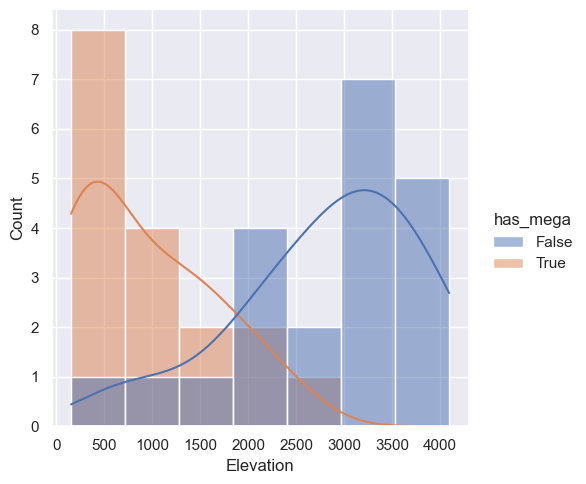

2.1972245773362196
-0.7081850579244856
-4.59511985013459


In [16]:
sns.displot(data=sites, x="Elevation", hue="has_mega", kde=True)
plt.show()

log_odds = lambda x: np.log(x/(1-x))
print(log_odds(0.9))
print(log_odds(0.33))
print(log_odds(0.01))

**Exercise 3.3**: Calculating the log odds for bins of elevation.

1. Make 7 equally spaced values of elevation between the minimum and maximum elevations using a np function. Save this as a variable called `elevation_bins`.

2. For each of your bins (7 values means *6* bins), get the fraction of sites in that bin that have megalaima, saving these in a list called `p`. Fill in the code below to do it. Store the elevations (left side of the bin) and for each, probability of megalaima.

3. Convert the fraction (p) to the log odds. In order to avoid dividing by zero, we first use the `np.clip` function that clips any values outside of a range to that range. Compare the `p_clipped` to `p`. What is different? Then, calculate the log odds using `p_clipped`. Again store elevation (left side of the bin) and log odds.

In [ ]:
p_clipped = np.clip(p, .001,.999)

4. Plot the elevation (the start of the bin) against the log odds of megalaima by running the cell below. Interpret the plot.

Since the log odds can take on any value, we can now model *log-odds*, instead of trying to model *p* in a linear model.  Higher log-odds <--> higher p <--> higher chance of a 1 vs a 0.

## 4. Estimate linear model for the log odds.

**Exercise 4.1** Now, propose a linear model for the log odds of megalaima as a function of elevation based on the plot we just made (like in Exercise 2.2, but now we are modeling log odds not p). 


**Exercise 4.2** Then, use the model to predict log-odds of megalaima at each elevation. Run the cell below to plot for each site, the predicted log odds of megalaima. 

In [ ]:
predicted_odds = ## fill this in
plt.plot(sites['Elevation'], predicted_odds,'.')

We can convert log odds back to probability using the formula $$p = {1 \over{1 + e^{-logOdds}}}$$  (you should be able to calculate this yourself by converting from $logOdds = log{ p \over {1-p} }$ if you remember algebra/pre-calculus, but no need if you don't). 

We can calculate $e^{-logOdds}$ using the numpy function `np.exp(-1 * logOdds)` . 

**Exercise 4.3** Plot elevation versus the probabilities your model gives.

Similar to when we used a list of `loc`s, we can use a list of `p`s for bernoulli to generate an observation for each value of `p`

In [ ]:
bernoulli.rvs(p=[.2,.2,.2,.8,.8,.8])

**Exercise 4.4**: Simulate what data you'd expect to see under your linear model for whether or not there is megalaima at each site. S Then recreate the histogram I made up top, but with your simulated data.

**Exercise 4.5** Interpret the meaning of the intercept and slope of the model in everyday words. Write one sentence for each.